<h1 style = "color:chocolate; margin-bottom: 20px"> Implementing DRAG using QuTiP</h1>

<a href = "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41534-020-00346-2/MediaObjects/41534_2020_346_Fig1_HTML.png?as=webp">
  <img src = "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41534-020-00346-2/MediaObjects/41534_2020_346_Fig1_HTML.png?as=webp" alt = "A visualisation" style = "; margin-top: 20px" width = "350"/>
</a>

<text> This is a practice code to implement a DRAG signal using QuTiP. </text>

In [2]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import matplotlib.pyplot as plt

import qutip as qt 
from IPython.display import display, Markdown, Latex
plt.rc('font', size = 16)


<h3 style = "color: black; margin-bottom = 5px; margin-top = 5px"> - Parameters - for simplicity  let's consider non-dissipative case; whence time evolution is unitary</h3>

In [28]:
delta = 0.0 # Detuning of the drive
alpha = -340.0  # Anharmonicity
sigma = 0.01 # Sigma of the Gaussian Pulse
cutoff = 4.0 * sigma # Total length of the drive pulse

<h3 style = "color: black; margin-bottom = 5px; margin-top = 5px"> - Operators</h3>

In [30]:
# Treat transmon as three level atom
ket0 = qt.basis(3,0)
ket1 = qt.basis(3,1)
ket2 = qt.basis(3,2)

# Pauli operators
sx01 = ket0 * ket1.dag() + ket1 * ket0.dag()
sy01 = -1j * ket0 * ket1.dag() + 1j *ket1 * ket0.dag()
sz01 = - ket0 * ket0.dag() + ket1 * ket1.dag()
sx12 = ket1 * ket2.dag() + ket2 * ket1.dag()
sy12 = -1j * ket1 * ket2.dag() + 1j *ket2 * ket1.dag()
sz12 = - ket1 * ket1.dag() + ket2 * ket2.dag()

# Creation and annihilation operators for the drive
a = qt.destroy(3)
adag = qt.create(3)

# Hamiltonian without drive
H0 = delta * adag * a + alpha/2 * adag * adag * a * a

<h3 style = "color = black; margin-bottom = 5px; margin-top = 5px">- Pulse Shape</h3>

In [32]:
def gaussian(t, args):
    """
    Gaussian shape with cutoff. Starts at t = 0, amplitude normalized to one
    """
    return (np.exp(-((t-cutoff/2)/sigma)**2/2) - np.exp(-(cutoff/sigma)**2/8)) \
    / (1-np.exp(-(cutoff/sigma)**2/8))

def dgaussian(t, args):
    """
    Derivative of Gaussian. Starts at t = 0, amplitude normalized to one
    """
    return -(t-cutoff/2)/sigma*np.exp(-((t-cutoff/2)/sigma)**2/2+0.5)

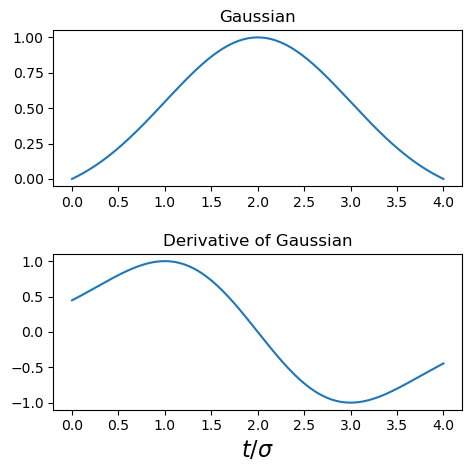

In [68]:
tList = np.linspace(0,cutoff,201)
plt.figure(figsize = (5,5))
plt.subplot(211)
plt.plot(tList/sigma, gaussian(tList, args = None))
plt.title('Gaussian', size = 12)
plt.tick_params(axis = 'both', labelsize = 10)
plt.subplot(212)
plt.plot(tList/sigma, dgaussian(tList, args = None))
plt.title('Derivative of Gaussian', size = 12)
plt.xlabel(r'$t/\sigma$')
plt.tick_params(axis = 'both',labelsize = 10)
plt.tight_layout()
plt.show()


<h3 style = "color:black; margin-bottom = 5px; margin-top = 5px">- Functions </h3>

The following function uses the propagator method in QuTiP to calculate the unitary matrix 
 caused by the application of a pulse. The time dependent part of the Hamiltonian is passed as a list in the form `H = [H0, [operator, function]]`, where `operator` is the drive (e.g. 
) and `function` describes its time dependence (e.g. Gaussian).

For a pulse with gaussian in in phase and drag in quadrature, we have `H = [H0, [(a+adag), gaussian], [1j*(a-adag), dgaussian]]`